# Social Media Marketing Data Analysis

<div style="background-color: #007BFF; padding: 10px; border-radius: 5px; color: white;">
<h1>1. Introduction</h1></div>

## KPI Calculation
Calculate CPM, CPC, CPV, Conversion Rate, ROAS  
Show your logic or formulas clearly

## Performance Analysis
Analyze campaign performance by Media Channel and Audience  
Highlight top and low performers

## Data Validation
Identify any data anomalies or issues  
Explain how you’d clean or validate it

## Optimization Suggestions
Recommend spend adjustments across channels or platforms  
Suggest an improved media mix

## Bonus
Include visualizations if possible (Excel, Tableau, etc.)


<div style="background-color: #007BFF; padding: 10px; border-radius: 5px; color: white;">
<h1>2. Data Overview</h1></div>

In [227]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##### 1. Dataset Preview (Head)

In [228]:
df=pd.read_excel("Sample_Media_Campaign_Data_16-04-2025.xlsx")
df.head()

Campaign ID Media Channel         Platform       Audience      Buy Type  \
0     CAM9999       Digital         Facebook          Youth  Programmatic   
1     CAM1061       Digital       Google Ads          Youth        Direct   
2     CAM1087       Digital          YouTube  Professionals  Programmatic   
3     CAM1031            TV           Zee TV  Professionals        Direct   
4     CAM1050         Print  Hindustan Times        Seniors  Programmatic   

        Date  Impressions  Clicks  Views  Spend (USD)  Sales Revenue (USD)  \
0 2024-05-10      1000000      50   1000    100000.00              1000.00   
1 2024-05-06       249833    7924  83049      9322.57             50224.67   
2 2024-05-01       248964    7317  45926     14154.86             95561.08   
3 2024-05-25       247714    4261  20724     16603.32             21905.62   
4 2024-05-12       247549    8132  89489      9134.50             26478.85   

   Conversions  
0            1  
1          526  
2          816  
3          254  
4          468

### Metadata for Campaign Dataset

**`Campaign ID`**  
Unique identifier for each marketing campaign.

**`Media Channel`**  
The broad category of media used for the campaign (e.g., Social, Search, Display).

**`Platform`**  
The specific platform where the ad was delivered (e.g., Facebook, Google, YouTube).

**`Audience`**  
The targeted segment of users defined by demographics, interests, or behaviors (e.g., Male 18–24, Retargeting).

**`Buy Type`**  
The method used to purchase media (e.g., Programmatic, Direct, Auction-based).

**`Date`**  
The date on which the data was recorded, typically in YYYY-MM-DD format.

**`Impressions`**  
Number of times the ad was shown to users.

**`Clicks`**  
Number of times users clicked on the ad.

**`Views`**  
Number of times a video ad was viewed (applicable for video campaigns).

**`Spend (USD)`**  
Total ad spend for the campaign in US dollars.

**`Sales Revenue (USD)`**  
Revenue generated from the campaign in US dollars.

**`Conversions`**  
Number of user actions that count as campaign success (e.g., purchases, sign-ups).


<div style="background-color: #007BFF; padding: 10px; border-radius: 5px; color: white;">
<h1>3. Data Cleaning and Validation Overview</h1></div>

## 3.1 Standardizing Column Names

In [229]:
df.columns = df.columns.str.strip().str.replace(' ', '_')
df.head(2)

Campaign_ID Media_Channel    Platform Audience      Buy_Type       Date  \
0     CAM9999       Digital    Facebook    Youth  Programmatic 2024-05-10   
1     CAM1061       Digital  Google Ads    Youth        Direct 2024-05-06   

   Impressions  Clicks  Views  Spend_(USD)  Sales_Revenue_(USD)  Conversions  
0      1000000      50   1000    100000.00              1000.00            1  
1       249833    7924  83049      9322.57             50224.67          526

## 3.2 Checking Missing Values

In [230]:
print(df.isnull().sum())

Campaign_ID            0
Media_Channel          0
Platform               0
Audience               0
Buy_Type               0
Date                   0
Impressions            0
Clicks                 0
Views                  0
Spend_(USD)            0
Sales_Revenue_(USD)    0
Conversions            0
dtype: int64


Observation:
- The media marketing data contains no null or missing values, we can proceed to next steps for further analysis

## 3.3 Checking Duplicate Records

In [231]:
duplicate_rows = df[df.duplicated()]
print(f"Duplicate Rows: {duplicate_rows.shape[0]}")

df = df.drop_duplicates()

Duplicate Rows: 0


## 3.4 Correcting Data Types

In [232]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

categorical_cols = ['Campaign_ID', 'Media_Channel', 'Platform', 'Audience', 'Buy_Type']
df[categorical_cols] = df[categorical_cols].astype('category')

numeric_cols = ['Impressions', 'Clicks', 'Views', 'Spend_(USD)', 'Sales_Revenue_(USD)', 'Conversions']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

In [233]:
df.dtypes

Campaign_ID                  category
Media_Channel                category
Platform                     category
Audience                     category
Buy_Type                     category
Date                   datetime64[ns]
Impressions                     int64
Clicks                          int64
Views                           int64
Spend_(USD)                   float64
Sales_Revenue_(USD)           float64
Conversions                     int64
dtype: object

## 3.5 Checking Inconsistencies In Columns

##### a.Inconsistencies in Categorical Columns

In [234]:
categorical_cols = ['Campaign_ID','Media_Channel', 'Platform', 'Audience', 'Buy_Type']

for col in categorical_cols:
    print(f'Unique values in {col}:')
    print(df[col].unique())
    print('\n---------------------------------------------------------------------------------------------------------------------')

Unique values in Campaign_ID:
['CAM9999', 'CAM1061', 'CAM1087', 'CAM1031', 'CAM1050', ..., 'CAM1004', 'CAM1095', 'CAM1129', 'CAM9998', 'CAM9997']
Length: 153
Categories (153, object): ['CAM1000', 'CAM1001', 'CAM1002', 'CAM1003', ..., 'CAM1149', 'CAM9997', 'CAM9998', 'CAM9999']

---------------------------------------------------------------------------------------------------------------------
Unique values in Media_Channel:
['Digital', 'TV', 'Print']
Categories (3, object): ['Digital', 'Print', 'TV']

---------------------------------------------------------------------------------------------------------------------
Unique values in Platform:
['Facebook', 'Google Ads', 'YouTube', 'Zee TV', 'Hindustan Times', ..., 'Sony', 'The Hindu', 'Colors', 'Star Plus', 'Instagram']
Length: 11
Categories (11, object): ['Colors', 'Facebook', 'Google Ads', 'Hindustan Times', ..., 'The Hindu', 'Times of India', 'YouTube', 'Zee TV']

--------------------------------------------------------------------

### Observations
- No spelling mistakes & No duplicates are present


##### b. Inconsistencies in Numerical Columns

In [235]:
numeric_cols = ['Impressions', 'Clicks', 'Views', 'Spend_(USD)', 'Sales_Revenue_(USD)', 'Conversions']

for col in numeric_cols:
    negatives = df[df[col] < 0]
    print(f'{col}:-  {negatives.shape[0]} ')


Impressions:-  0 
Clicks:-  0 
Views:-  0 
Spend_(USD):-  0 
Sales_Revenue_(USD):-  0 
Conversions:-  0 


##### c. Check if the dates are range in correct Range

In [236]:
print(df['Date'].min(), " & ",df['Date'].max())

2024-05-01 00:00:00  &  2024-05-30 00:00:00


### Observations:

- The starting date and the latest date in the dataset appear logical and fall within a realistic timeframe.
- There are no absurd dates or future dates, which indicates that the campaign data is credible and valid for analysis.

<div style="background-color: #007BFF; padding: 10px; border-radius: 5px; color: white;">
<h1>4. Outlier Detetion and Treatment</h1></div>

## 4.1 Distribution of Columns Values

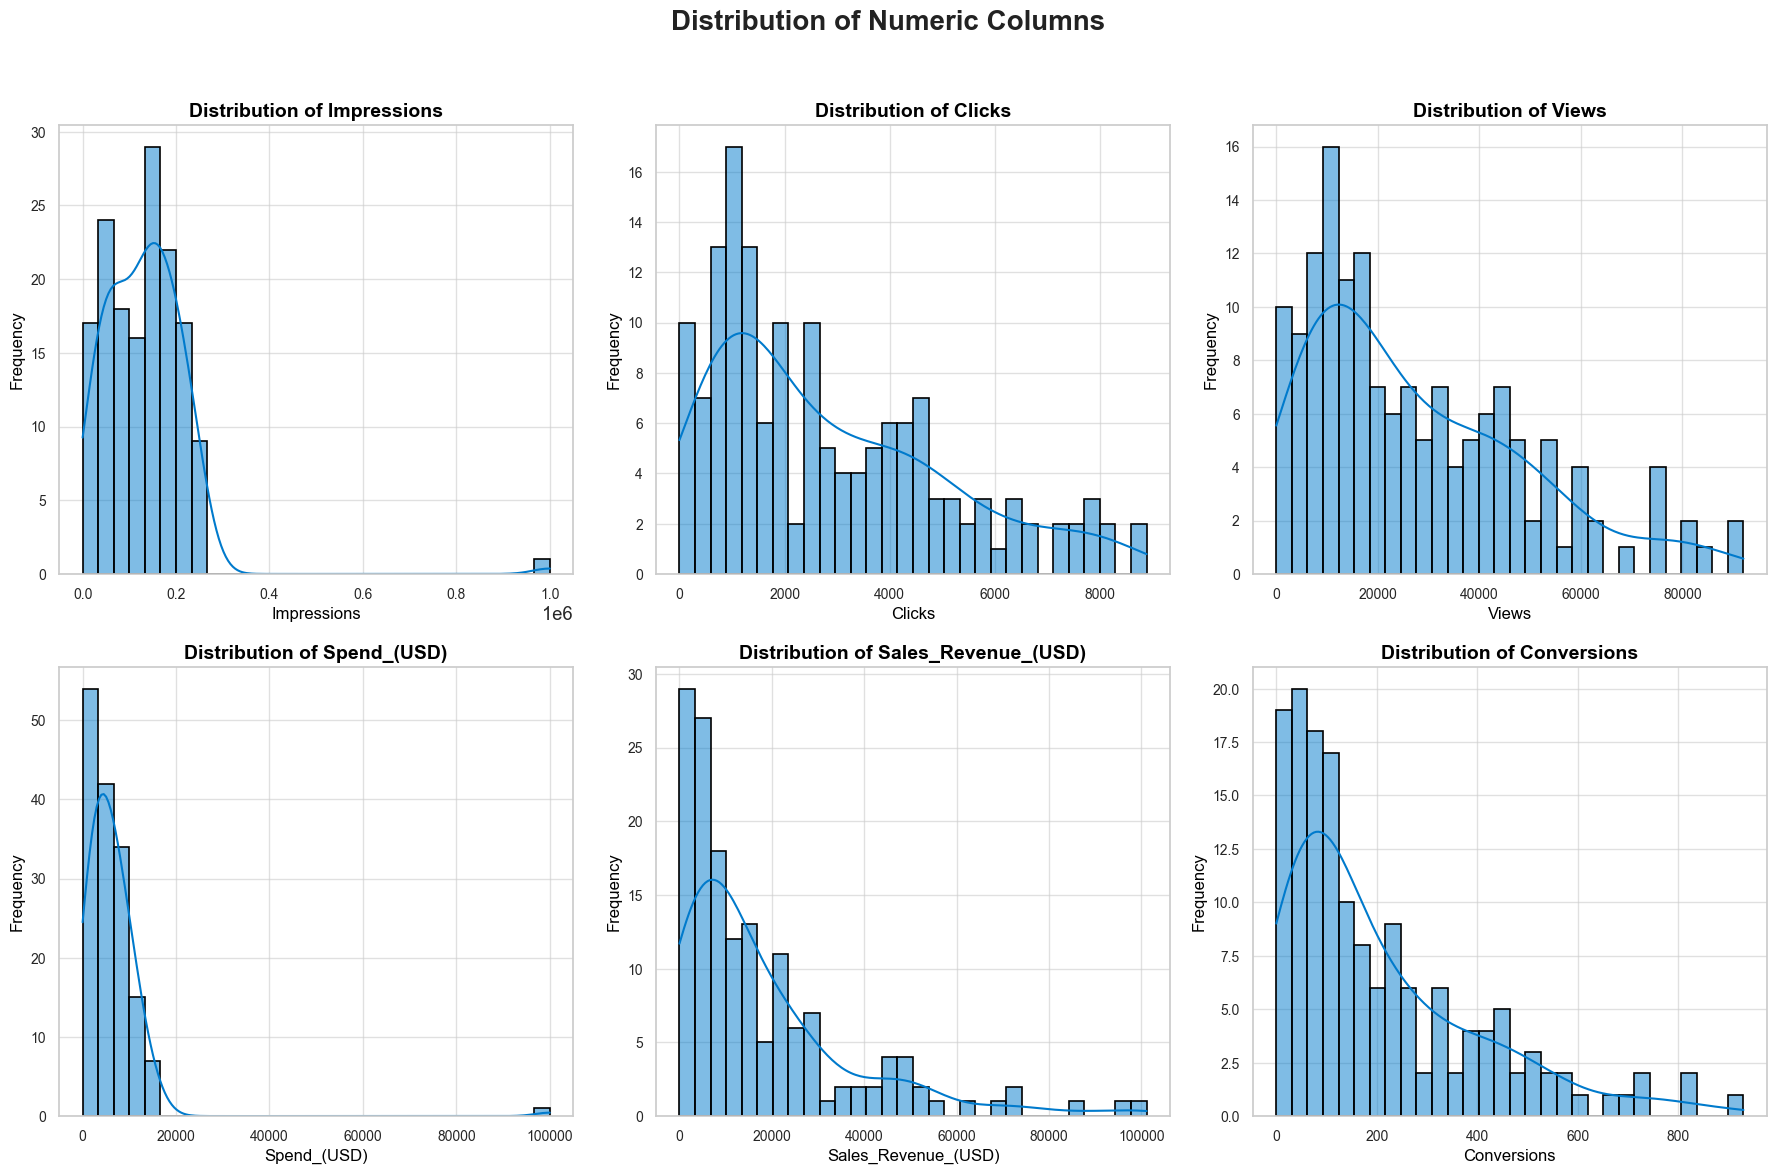

In [237]:
# List of numeric columns
numeric_cols = ['Impressions', 'Clicks', 'Views', 'Spend_(USD)', 'Sales_Revenue_(USD)', 'Conversions']

# figure size and style
plt.figure(figsize=(18, 12))
sns.set_style('whitegrid')

# color selection
strong_color = '#007acc'  # deep sky blue

# Loop through each numeric column and plot histogram 
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)  # 2 rows, 3 columns layout
    sns.histplot(df[col], bins=30, kde=True, color=strong_color, edgecolor='black', linewidth=1.2)
    plt.title(f'Distribution of {col}', fontsize=14, fontweight='bold', color='black')
    plt.xlabel(col, fontsize=12, color='black')
    plt.ylabel('Frequency', fontsize=12, color='black')
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

plt.suptitle('Distribution of Numeric Columns', fontsize=20, fontweight='bold', color='#222222')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### Observations:

Looking at campaign data, there some interesting patterns in how they're performing.

- **Impressions**  
Looking at our campaigns, impressions are pretty evenly spread. There isn't a big difference between our high and low performers when it comes to who's seeing the ads.

- **Clicks**  
For clicks, we're seeing something different. Most campaigns get a modest number of clicks, but a few are really performing well with much higher engagement.

- **Views**  
Views follow the same pattern - most campaigns get low to medium views, but a handful stand out with some impressive numbers.

- **Spend (USD)**  
Our spending shows a similar trend. Most campaigns use moderate budgets, but we have a few big spenders investing at much higher levels than everyone else.

- **Sales Revenue (USD)**  
With sales revenue, the similar case. Most campaigns bring in modest returns, while a few rock stars are delivering the big money that pulls our average up.

- **Conversions**  
Looking at the visual, most campaigns convert at lower rates, but a small group of high performers are driving most of our conversion success

</div>


## 4.2 Visualize Data Using Box Plot for Outlier Spotting

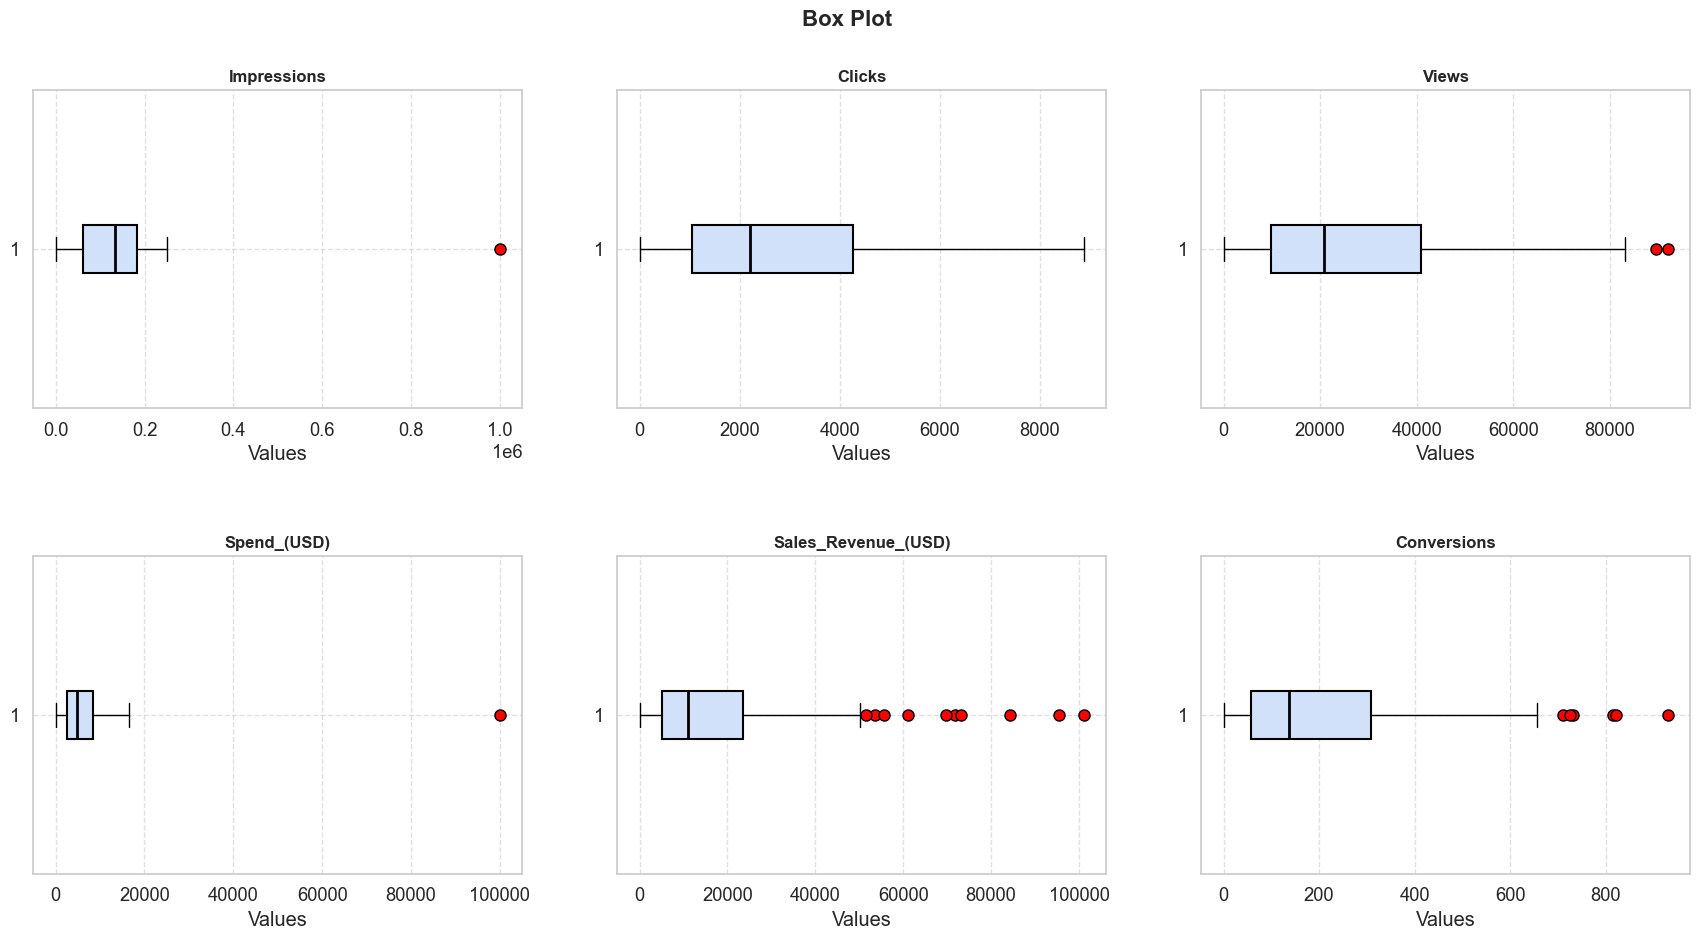

In [238]:
# List of numeric columns
numeric_cols = ['Impressions', 'Clicks', 'Views', 'Spend_(USD)', 'Sales_Revenue_(USD)', 'Conversions']

# figure size
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()

# Boxplots
for idx, col in enumerate(numeric_cols):
    bp = axes[idx].boxplot(
        df[col],
        patch_artist=True,
        vert=False,  # Horizontal box plot
        flierprops=dict(marker='o', markerfacecolor='red', markersize=8, linestyle='none')  # Red outliers
    )
    axes[idx].set_title(f'{col}', fontsize=12)
    axes[idx].set_xlabel('Values')
    axes[idx].grid(True, linestyle='--', alpha=0.6)

    # Style the box
    for box in bp['boxes']:
        box.set(facecolor='#D0E1F9', linewidth=1.5)
    
    # Style the median
    for median in bp['medians']:
        median.set(color='black', linewidth=2)

plt.suptitle('Box Plot ', fontsize=16, fontweight='bold')

plt.tight_layout(pad=3.0)
plt.subplots_adjust(top=0.9)

plt.show()

### Observations:
- We found several outliers in the columns " Impressions, Views, Spend_(USD), Sales_Revenue_(USD), and Conversions using the IQR method.
- These outliers need to be handled carefully because they can skew the analysis and lead to wrong conclusions if left untreated, ultimately affecting the business decission

## 4.3 Column Value Threshold

In [239]:
# List of numeric columns
numeric_cols = ['Impressions', 'Clicks', 'Views', 'Spend_(USD)', 'Sales_Revenue_(USD)', 'Conversions']

# Create an empty dictionary to store the results
results = {}

for col in numeric_cols:
    # Calculate Q1, Q3, and IQR
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Calculate Lower and Upper Bound
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Calculate 95th Percentile
    percentile_95 = df[col].quantile(0.95)

    # Maximum value
    max_value = df[col].max()

    # Median
    median = df[col].median()

    # Store the results (rounded and converted to int)
    results[col] = {
        'Lower Bound': int(round(lower_bound, 0)),
        'Upper Bound': int(round(upper_bound, 0)),
        '95th Percentile': int(round(percentile_95, 0)),
        'Maximum Value': int(round(max_value, 0)),
        'Median': int(round(median, 0))
    }

# Convert the dictionary to a DataFrame
import pandas as pd
summary_df = pd.DataFrame(results).transpose()

summary_df

Lower Bound  Upper Bound  95th Percentile  Maximum Value  \
Impressions              -117646       362286           240905        1000000   
Clicks                     -3776         9084             7490           8884   
Views                     -36828        87636            74488          92004   
Spend_(USD)                -6200        17223            13322         100000   
Sales_Revenue_(USD)       -22494        51197            54456         101112   
Conversions                 -318          686              589            930   

                     Median  
Impressions          134040  
Clicks                 2216  
Views                 20895  
Spend_(USD)            4912  
Sales_Revenue_(USD)   10911  
Conversions             138

## 4.4 Individual Column Outlier Handling Using IQR Method

#### Note: 
- To handle outliers, I have used capping at the 95th percentile. This keeps the real data and the natural fluctuations or trends that happen because of seasons, events,or any due any external factors

<div style="background-color:#C71585; color:white; padding:10px;"> <b>
1. Impressions
</div>

In [240]:
# Calculate Q1, Q3, and IQR
Q1 = df['Impressions'].quantile(0.25)
Q3 = df['Impressions'].quantile(0.75)
IQR = Q3 - Q1

# Lower and Upper Bound
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
Impressions_outliers = df[(df['Impressions'] < lower_bound) | (df['Impressions'] > upper_bound)]

# outlier rows
Impressions_outliers

Campaign_ID Media_Channel  Platform Audience      Buy_Type       Date  \
0     CAM9999       Digital  Facebook    Youth  Programmatic 2024-05-10   

   Impressions  Clicks  Views  Spend_(USD)  Sales_Revenue_(USD)  Conversions  
0      1000000      50   1000     100000.0               1000.0            1

### Obseravtions:
-  There is an outlier in the Impressions column with a value of 100000.0, which is much higher compared to most of the other values. To handle this and make the data more balanced, we will cap the Impressions at the 95th percentile.

In [241]:
# Capping Impressions at its 95th percentile
impressions_95 = df['Impressions'].quantile(0.95)
df['Impressions'] = df['Impressions'].clip(upper=impressions_95)

<div style="background-color:#C71585; color:white; padding:10px;"> <b>
2. Spend (USD)
</div>

In [242]:
# Calculate Q1, Q3, and IQR
Q1 = df['Spend_(USD)'].quantile(0.25)
Q3 = df['Spend_(USD)'].quantile(0.75)
IQR = Q3 - Q1

# Calculate Lower and Upper Bound
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
Spend_USD_outliers = df[(df['Spend_(USD)'] < lower_bound) | (df['Spend_(USD)'] > upper_bound)]

# Display the outlier rows
Spend_USD_outliers

Campaign_ID Media_Channel  Platform Audience      Buy_Type       Date  \
0     CAM9999       Digital  Facebook    Youth  Programmatic 2024-05-10   

   Impressions  Clicks  Views  Spend_(USD)  Sales_Revenue_(USD)  Conversions  
0     240905.4      50   1000     100000.0               1000.0            1

Obseravtions:
-  There is an outlier in the Spend_(USD) column with a value of 100000.0, which is much higher compared to most of the other values. To handle this and make the data more balanced, we will cap the Impressions at the 95th percentile.

In [243]:
# Capping Spend at its 95th percentile
Spend = df['Spend_(USD)'].quantile(0.95)
df['Spend_(USD)'] = df['Spend_(USD)'].clip(upper=Spend)

<div style="background-color:#C71585; color:white; padding:10px;"> <b>
3. Sales Revenue (USD)
</div>

In [244]:
Q1 = df['Sales_Revenue_(USD)'].quantile(0.25)
Q3 = df['Sales_Revenue_(USD)'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

Sales_Revenue_outliers = df[(df['Sales_Revenue_(USD)'] < lower_bound) | (df['Sales_Revenue_(USD)'] > upper_bound)].reset_index()
Sales_Revenue_outliers

index Campaign_ID Media_Channel         Platform       Audience  \
0      2     CAM1087       Digital          YouTube  Professionals   
1      7     CAM1090            TV             Sony  Professionals   
2     12     CAM1071         Print        The Hindu        Seniors   
3     13     CAM1079            TV        Star Plus        Seniors   
4     22     CAM1145         Print  Hindustan Times          Youth   
5     24     CAM1024            TV           Colors  Professionals   
6     27     CAM1054            TV           Colors  Professionals   
7     34     CAM1009         Print  Hindustan Times          Youth   
8     52     CAM1020         Print        The Hindu        Seniors   
9     58     CAM1051         Print  Hindustan Times         Family   

       Buy_Type       Date  Impressions  Clicks  Views  Spend_(USD)  \
0  Programmatic 2024-05-01     240905.4    7317  45926    13322.222   
1        Direct 2024-05-23     240905.4    7224  58319     8706.540   
2  Programmatic 2024-05-25     229798.0    8635  80531     9525.060   
3        Direct 2024-05-26     224532.0    5156  29555    11016.720   
4  Programmatic 2024-05-15     209976.0    7852  43631     5388.380   
5        Direct 2024-05-15     207271.0    7876  33810     9521.930   
6  Programmatic 2024-05-29     199407.0    4705  47702    10343.540   
7  Programmatic 2024-05-22     186830.0    6441  38751     7427.900   
8  Programmatic 2024-05-14     163371.0    6132  54376     8441.410   
9        Direct 2024-05-28     152038.0    4336  25063     4219.370   

   Sales_Revenue_(USD)  Conversions  
0             95561.08          816  
1             71685.63          732  
2             84413.58          821  
3             61170.61          548  
4            101112.27          930  
5             53647.85          711  
6             51464.70          435  
7             73159.05          725  
8             69810.88          657  
9             55667.38          512

Obseravtions:
- The maximum Sales Revenue is 101,112, which is much higher compared to the rest of the values. To make the results more realistic and reduce the impact of extreme values, we will cap Sales Revenue at its 95th percentile

In [245]:
# Capping Sales_Revenue at its 95th percentile
Sales_Revenue = df['Sales_Revenue_(USD)'].quantile(0.95)
df['Sales_Revenue_(USD)'] = df['Sales_Revenue_(USD)'].clip(upper=Sales_Revenue)

<div style="background-color:#C71585; color:white; padding:10px;"> <b>
4. Views
</div>

In [246]:
Q1 = df['Views'].quantile(0.25)
Q3 = df['Views'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

Views_outliers = df[(df['Views'] < lower_bound) | (df['Views'] > upper_bound)].reset_index()
Views_outliers

index Campaign_ID Media_Channel         Platform Audience      Buy_Type  \
0      4     CAM1050         Print  Hindustan Times  Seniors  Programmatic   
1     11     CAM1080            TV             Sony    Youth  Programmatic   

        Date  Impressions  Clicks  Views  Spend_(USD)  Sales_Revenue_(USD)  \
0 2024-05-12     240905.4    8132  89489     9134.500             26478.85   
1 2024-05-17     232864.0    8884  92004    13322.222             28536.82   

   Conversions  
0          468  
1          511

Oberavations:
-  The maximum value (92,004) is only slightly higher than the IQR upper bound (87,636). Therefore, there is no need to remove these value. 

<div style="background-color:#C71585; color:white; padding:10px;"> <b>
5. Conversions
</div>

In [247]:
Q1 = df['Conversions'].quantile(0.25)
Q3 = df['Conversions'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

Conversions_outliers = df[(df['Conversions'] < lower_bound) | (df['Conversions'] > upper_bound)].reset_index()
Conversions_outliers

index Campaign_ID Media_Channel         Platform       Audience  \
0      2     CAM1087       Digital          YouTube  Professionals   
1      7     CAM1090            TV             Sony  Professionals   
2     12     CAM1071         Print        The Hindu        Seniors   
3     22     CAM1145         Print  Hindustan Times          Youth   
4     24     CAM1024            TV           Colors  Professionals   
5     34     CAM1009         Print  Hindustan Times          Youth   

       Buy_Type       Date  Impressions  Clicks  Views  Spend_(USD)  \
0  Programmatic 2024-05-01     240905.4    7317  45926    13322.222   
1        Direct 2024-05-23     240905.4    7224  58319     8706.540   
2  Programmatic 2024-05-25     229798.0    8635  80531     9525.060   
3  Programmatic 2024-05-15     209976.0    7852  43631     5388.380   
4        Direct 2024-05-15     207271.0    7876  33810     9521.930   
5  Programmatic 2024-05-22     186830.0    6441  38751     7427.900   

   Sales_Revenue_(USD)  Conversions  
0            54455.662          816  
1            54455.662          732  
2            54455.662          821  
3            54455.662          930  
4            53647.850          711  
5            54455.662          725

Observations:
- The outlier conversion ranges from 711 to 930, which is not a significant deviation from the other data points.
- As we can see from the above table, big values are observed mainly on four days: 1st May 2024, 15th May 2024, 22nd May 2024, and 23rd May 2024. This can happen because of a sudden change in trend or due to other external factors

Summary
- After careful observation, I have capped the columns Impressions, Spend (USD), and Sales Revenue (USD) at the 95th percentile. This will allow more realistic high values while blocking only the extreme outliers

## 4.5 Column Values Post Outlier Treatment

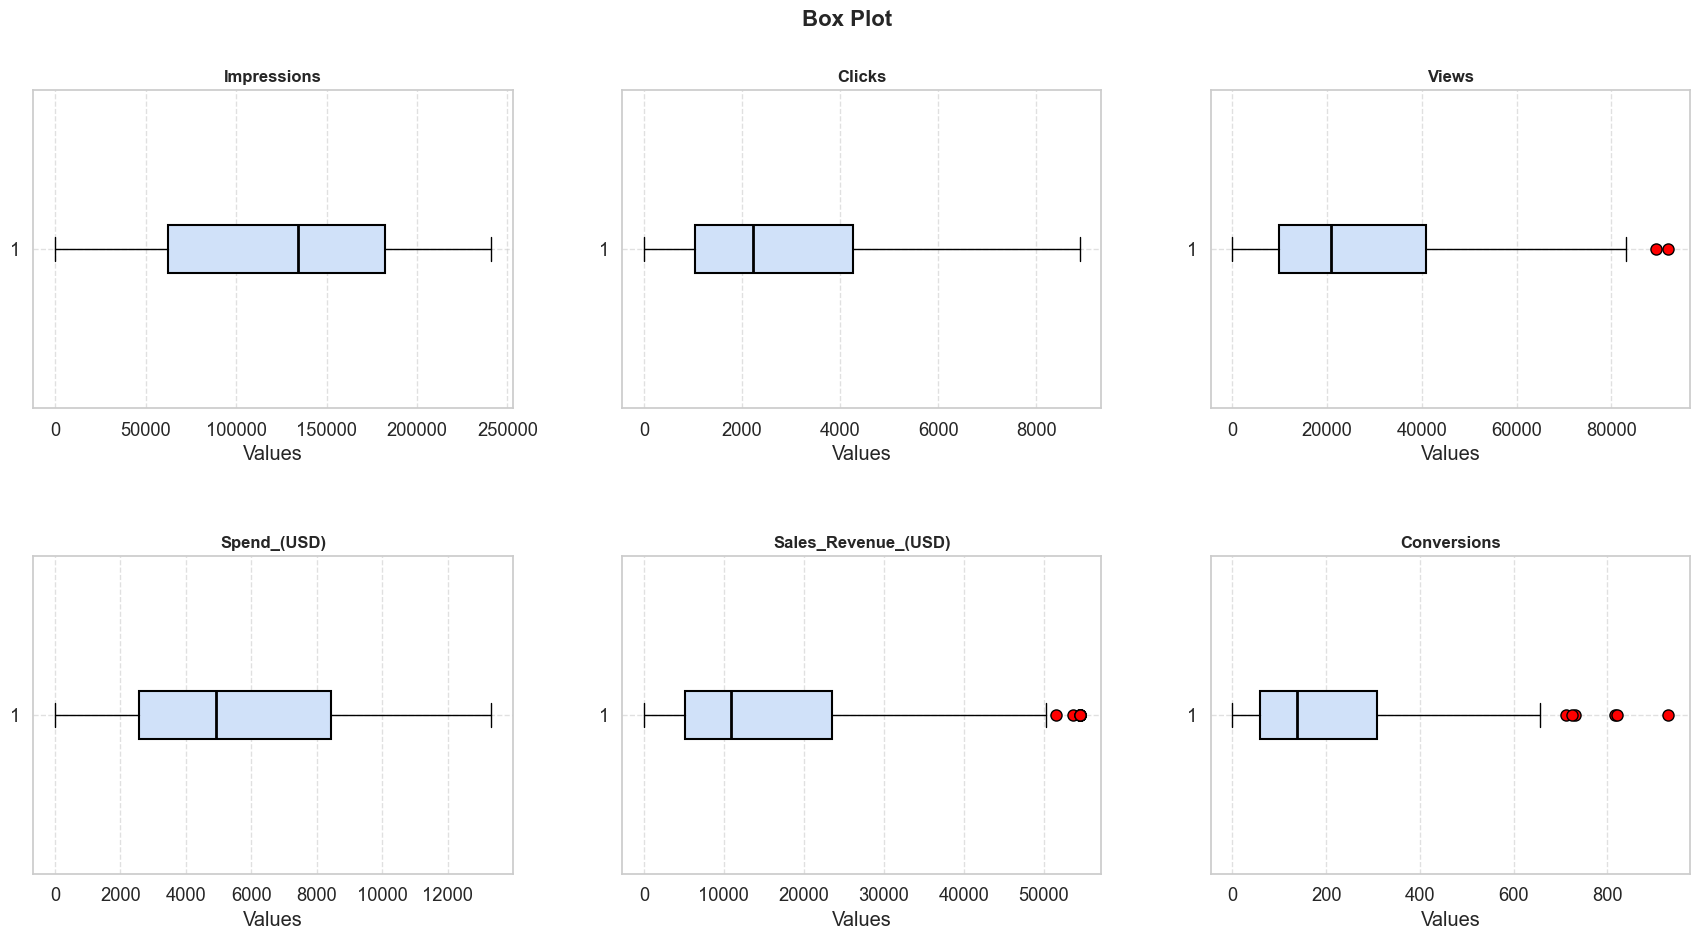

In [248]:
# List of numeric columns
numeric_cols = ['Impressions', 'Clicks', 'Views', 'Spend_(USD)', 'Sales_Revenue_(USD)', 'Conversions']

# figure size
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()

# Boxplots
for idx, col in enumerate(numeric_cols):
    bp = axes[idx].boxplot(
        df[col],
        patch_artist=True,
        vert=False,  # Horizontal box plot
        flierprops=dict(marker='o', markerfacecolor='red', markersize=8, linestyle='none')  # Red outliers
    )
    axes[idx].set_title(f'{col}', fontsize=12)
    axes[idx].set_xlabel('Values')
    axes[idx].grid(True, linestyle='--', alpha=0.6)

    # Style the box
    for box in bp['boxes']:
        box.set(facecolor='#D0E1F9', linewidth=1.5)
    
    # Style the median
    for median in bp['medians']:
        median.set(color='black', linewidth=2)

plt.suptitle('Box Plot ', fontsize=16, fontweight='bold')

plt.tight_layout(pad=3.0)
plt.subplots_adjust(top=0.9)

plt.show()

## Observation

As we can see from the above box plots, most of the extreme values are no longer visible after applying the capping at the 95th percentile. The data now looks clean and stable. We can move ahead with the detailed analysis.


<div style="background-color: #007BFF; padding: 10px; border-radius: 5px; color: white;">
<h1>5. KPI Calculation</h1></div>

## 5.1 KPI Formulas

| KPI | Formula |
|:--- |:--- |
| **CPM (Cost Per Mille)** | (Spend (USD) ÷ Impressions × 1000)|
| **CPC (Cost Per Click)** | Spend (USD) ÷ Clicks |
| **CPV (Cost Per View)** | Spend (USD) ÷ Views |
| **Conversion Rate (%)** | (Conversions ÷ Clicks) × 100 |
| **ROAS (Return on Ad Spend)** | Sales Revenue (USD) ÷ Spend (USD) |
| **CTR (Click Throug Rate)** | (Total Clicks / Total Impressions) * 100 |

## 5.2 KPIs column calculated

In [249]:
df['CPM'] = np.where(df['Impressions'] > 0, (df['Spend_(USD)'] / df['Impressions']) * 1000, np.nan)

df['CPC'] = np.where(df['Clicks'] > 0, df['Spend_(USD)'] / df['Clicks'], np.nan)

df['CPV'] = np.where(df['Views'] > 0, df['Spend_(USD)'] / df['Views'], np.nan) 

df['Conversion_Rate_%'] = np.where(df['Clicks'] > 0, (df['Conversions'] / df['Clicks']) * 100, np.nan)

df['ROAS'] = np.where(df['Spend_(USD)'] > 0, df['Sales_Revenue_(USD)'] / df['Spend_(USD)'], np.nan)

df['CTR']=np.where(df['Impressions'] > 0, df['Clicks'] / df['Impressions'], np.nan)

df.tail()

Campaign_ID Media_Channel        Platform       Audience      Buy_Type  \
148     CAM1004       Digital        Facebook  Professionals  Programmatic   
149     CAM1095       Digital         YouTube         Family  Programmatic   
150     CAM1129       Digital         YouTube  Professionals  Programmatic   
151     CAM9998            TV          Zee TV         Family        Direct   
152     CAM9997         Print  Times of India         Adults        Direct   

          Date  Impressions  Clicks  Views  Spend_(USD)  Sales_Revenue_(USD)  \
148 2024-05-14      12747.0     227   2672       755.37               773.97   
149 2024-05-15      10404.0      72   3669       630.95               958.12   
150 2024-05-27      10235.0     197   3853       711.81               535.82   
151 2024-05-15        500.0     300    450        10.00             10000.00   
152 2024-05-20          0.0       0      0      1000.00                 0.00   

     Conversions        CPM       CPC       CPV  Conversion_Rate_%  \
148            9  59.258649  3.327621  0.282698           3.964758   
149            8  60.644944  8.763194  0.171968          11.111111   
150            7  69.546654  3.613249  0.184742           3.553299   
151          100  20.000000  0.033333  0.022222          33.333333   
152            0        NaN       NaN       NaN                NaN   

            ROAS       CTR  
148     1.024624  0.017808  
149     1.518536  0.006920  
150     0.752757  0.019248  
151  1000.000000  0.600000  
152     0.000000       NaN

**Note: 
- I set it as NaN because there were no impressions, no clicks, and no views. If we put zero, it would wrongly look like we got results for free, which is not true. Hence, I have left it blank (**NaN**) to avoid misleading results

In [250]:
df.isnull().sum()

Campaign_ID            0
Media_Channel          0
Platform               0
Audience               0
Buy_Type               0
Date                   0
Impressions            0
Clicks                 0
Views                  0
Spend_(USD)            0
Sales_Revenue_(USD)    0
Conversions            0
CPM                    1
CPC                    1
CPV                    1
Conversion_Rate_%      1
ROAS                   0
CTR                    1
dtype: int64

### Observations

- The final data frame columns contain some null values, specifically in the calculated columns, which are due to zero Impressions, Clicks, and Views.


---------------------------------------------------------------------------------------------------------------------------------

<div style="background-color: #007BFF; padding: 10px; border-radius: 5px; color: white;">
<h1> 🎯 1. Performance Analysis</h1></div>

# 1.1 Analyze campaign performance by Media Channel and Audience

In [251]:
# Group by Media Channel and Audience
summary = df.groupby(['Media_Channel', 'Audience'], observed=True).agg({
    'Spend_(USD)': 'sum',
    'Sales_Revenue_(USD)': 'sum',
    'ROAS': 'mean',
    'Conversions': 'sum',
    'Clicks': 'sum'
}).reset_index()

# Recalculate Conversion Rate (%) after grouping
summary['Conversion_Rate_%'] = (summary['Conversions'] / summary['Clicks']) * 100

# Drop the Clicks column from final output
summary = summary.drop(columns=['Clicks'])

# Sort by Media Channel and then Audience (optional if you want within Media Channel)
summary_sorted = summary.sort_values(by=['Media_Channel', 'Audience'])

summary_sorted

Media_Channel       Audience  Spend_(USD)  Sales_Revenue_(USD)        ROAS  \
0        Digital         Adults    65147.482           171234.040    4.369001   
1        Digital         Family    81905.060           225394.940    2.985969   
2        Digital  Professionals    87274.912           190789.562    2.151790   
3        Digital        Seniors    43802.630           144634.900    3.658504   
4        Digital          Youth    82763.274           203877.600    2.663007   
5          Print         Adults    27032.572            67138.360    2.445149   
6          Print         Family    74606.200           182046.852    3.067745   
7          Print  Professionals    22351.810            91792.890    2.871323   
8          Print        Seniors    62881.890           229940.684    3.423185   
9          Print          Youth    83103.492           236389.514    3.183391   
10            TV         Adults    23329.160            19613.140    1.084344   
11            TV         Family    30359.770           122391.180  128.331302   
12            TV  Professionals    81259.992           292381.252    3.804918   
13            TV        Seniors    21250.010           141317.122    7.275770   
14            TV          Youth    86424.732           241379.770    2.740107   

    Conversions  Conversion_Rate_%  
0          2124           6.673160  
1          3076           8.343958  
2          2563           6.896830  
3          1425           6.652972  
4          2594           8.464400  
5           646           4.861163  
6          2208           6.728425  
7           960           6.296734  
8          3196           6.486048  
9          3266           7.842478  
10          294           6.345780  
11         1391           6.330497  
12         3487           7.710337  
13         1330           9.742876  
14         2985           7.802086

# 1.2 Highlight Top and Low Performers

## a. Top Performers

### TV - Family Audience
- ROAS is 128.33, the highest among all.
- Conversion Rate is 6.33 percent, which is good.
- This is the strongest and safest performer.

### TV - Seniors Audience
- ROAS is 7, which is very good.
- Conversion Rate is 9 %, the highest among all groups.
- Seniors respond very well to TV ads.

### Digital - Adults Audience
- ROAS is 4, good for digital.
- Conversion Rate is 6 %, which is healthy.
- Strong digital performance.

### TV - Professionals Audience
- ROAS is 3.80, a stable return.
- Conversion Rate is 7.71 %, very good.
- Good audience to continue investing in.

### Digital - Seniors Audience
- ROAS is 3.66, stable for digital.
- Conversion Rate is 6.65 percent, good.
- Seniors are also a strong group in digital.

## b. Low Performers

### TV - Adults Audience
- ROAS is 1.08, the worst among all groups.
- Conversion Rate is 6 %, decent, but money return is very poor.
- This campaign needs immediate action or budget cut.

### Digital - Professionals Audience
- ROAS is 2.15, which is low for digital.
- Conversion Rate is 6.89 %, okay, but not enough to cover the spend.
- Needs optimization.

### Print - Professionals Audience
- ROAS is 2.87, weak compared to others.
- Conversion Rate is 6.30 %, average.
- Print campaigns are not giving good returns here.

### Digital - Youth Audience
- ROAS is 2.99, lower than other digital groups.
- Conversion Rate is 8 %, good, but revenue generation is still not strong.
- Focus more on improving return.


### Observations:

- TV ads for Family audience are doing very well. We are getting maximum sales for the money we spent.
- TV ads for Senior audience are also giving strong results with very high conversion rates.
- TV ads for Adult audience are not working properly. We are spending money but not getting good returns.
- Digital ads for Seniors and Adults are performing okay, but there is still room for improvement.
- Print ads are giving average results. We should keep a watch and plan changes if needed.


-----------------------------------------------------------------------------------------------------------------------------------------

<div style="background-color: #007BFF; padding: 10px; border-radius: 5px; color: white;">
<h1> 2. Optimization Suggestions</h1></div>

##### Objectives
- Recommend spend adjustments across channels/platforms
- Suggest an improved media mix

##### Methodology Followed to Recommend an Optimized Media Mix

1. **Understand Performance Metrics**  
   Analyzed Spend, Conversions, Revenue, Efficiency_Score, and ROAS for each Channel and Platform.  
   Media optimization must balance ROAS and Cost per Conversion, so created a new KPI called Efficiency_Score.

   **Formula for Efficiency_Score:**

   $$
   \text{Efficiency Score} = \frac{\text{ROAS Rank} + \text{Cost per Conversion Rank}}{2}
   $$

   **Note:** Took the average of the two ranks to balance profitability and cost efficiency equally.

2. **Interpret KPIs Across Channels and Platforms**  
   Carefully reviewed key performance indicators to understand efficiency and effectiveness:
   
   - **ROAS** (Return on Ad Spend): higher is better
   - **Cost per Conversion**: lower is better
   - **Conversion Rate**: higher is better

3. **Identify Top Performers**  
   Found channels and platforms delivering the best returns and highest efficiency.

4. **Identify Low Performers**  
   Identified platforms with poor ROAS or inefficient spending.

5. **Provide Optimized Recommendations**  
   Suggested where to increase spend, and where to reduce or cut spend to improve overall media performance.


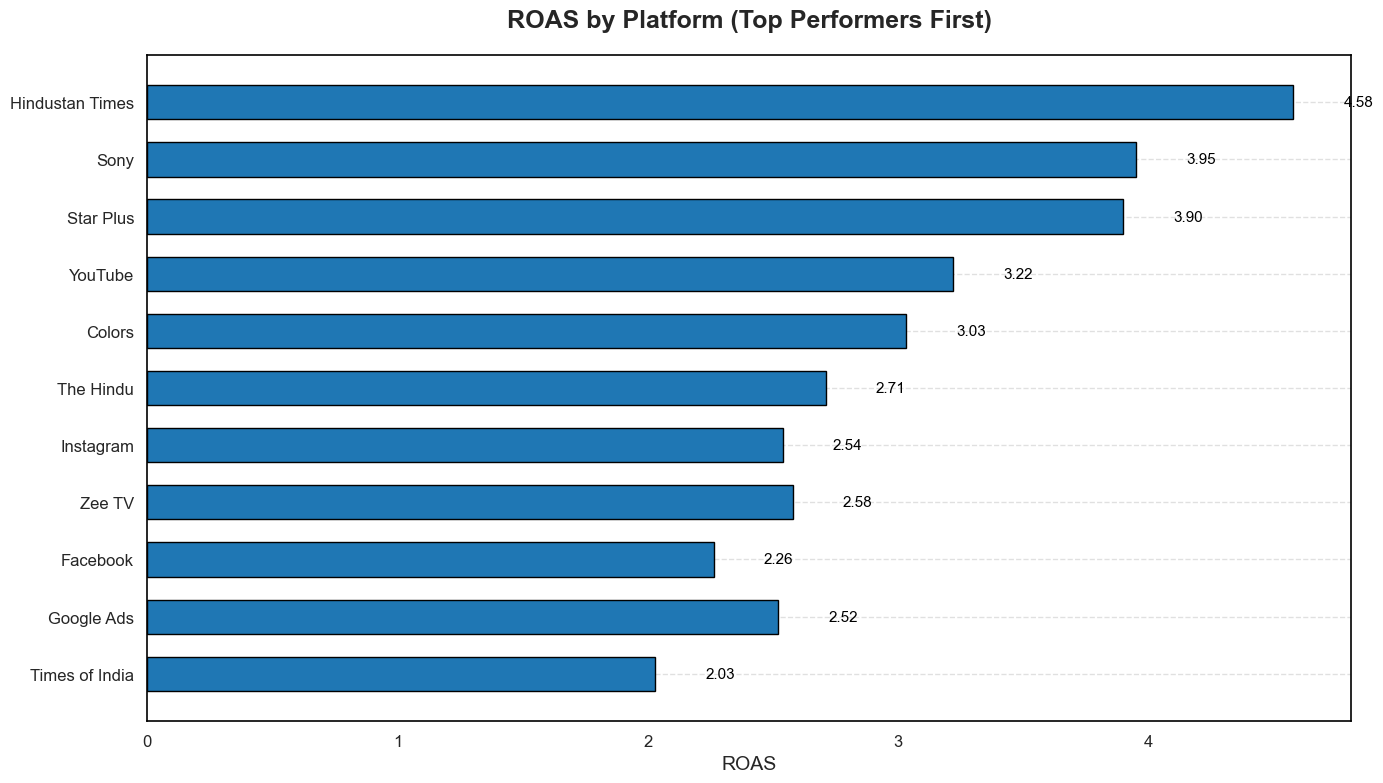

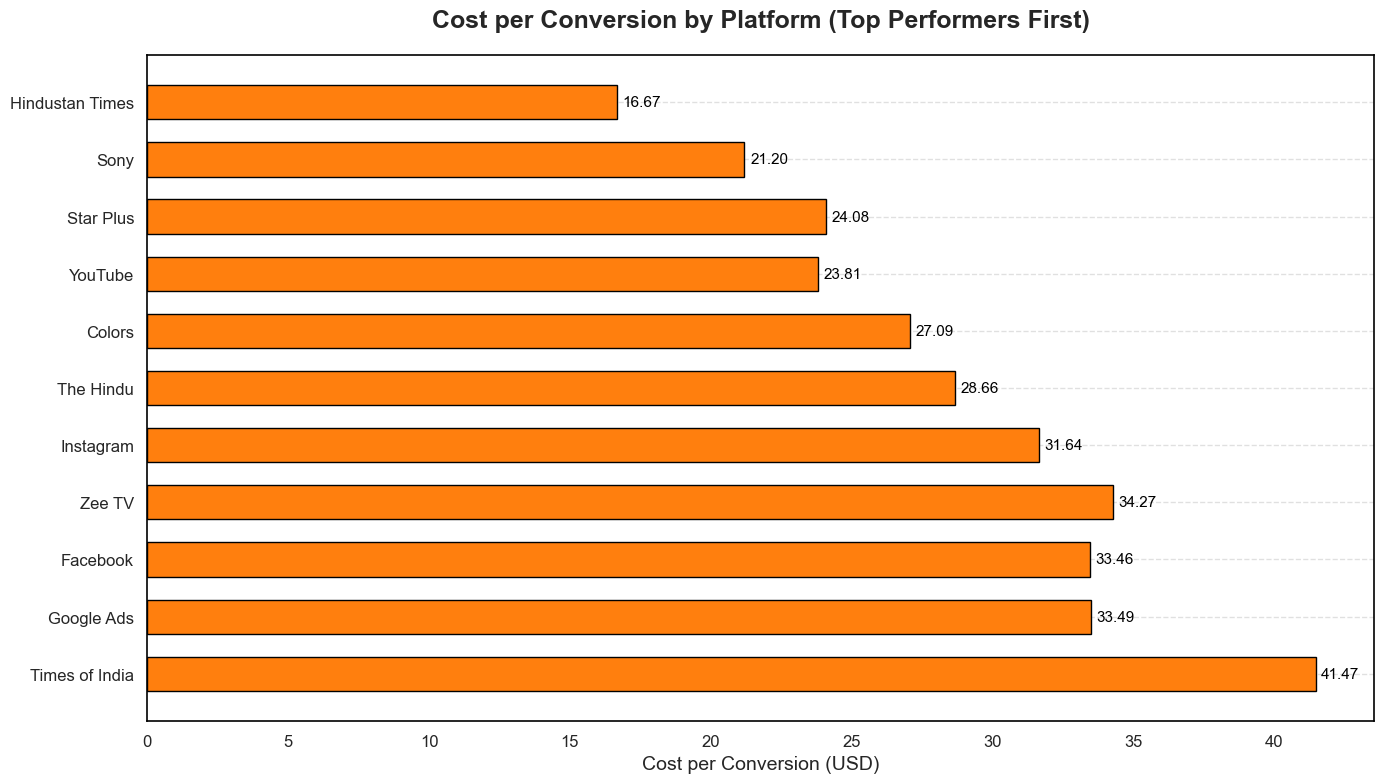

In [252]:
import matplotlib.pyplot as plt

#  Group by Platform
platform_summary = df.groupby('Platform', observed=True).agg({
    'Spend_(USD)': 'sum',
    'Conversions': 'sum',
    'Sales_Revenue_(USD)': 'sum'
}).reset_index()

#  ROAS and Cost per Conversion
platform_summary['ROAS'] = platform_summary['Sales_Revenue_(USD)'] / platform_summary['Spend_(USD)']
platform_summary['Cost_per_Conversion'] = platform_summary['Spend_(USD)'] / platform_summary['Conversions']

# Efficiency Scoring
platform_summary['ROAS_Rank'] = platform_summary['ROAS'].rank(ascending=False)
platform_summary['Cost_per_Conversion_Rank'] = platform_summary['Cost_per_Conversion'].rank(ascending=True)
platform_summary['Efficiency_Score'] = (platform_summary['ROAS_Rank'] + platform_summary['Cost_per_Conversion_Rank']) / 2

# Sort by Efficiency
platform_summary_sorted = platform_summary.sort_values(by='Efficiency_Score')

#  figure settings
plt.rcParams.update({
    'axes.edgecolor': 'black',
    'axes.linewidth': 1.2,
    'grid.linestyle': '--',
    'grid.alpha': 0.6,
    'font.size': 12,
    'axes.titlesize': 18,
    'axes.titleweight': 'bold',
    'axes.labelsize': 14,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12
})


# ROAS by Platform
fig, ax = plt.subplots(figsize=(14, 8))
bars = ax.barh(platform_summary_sorted['Platform'], 
               platform_summary_sorted['ROAS'], 
               color='#1f77b4', edgecolor='black', height=0.6)

ax.set_xlabel('ROAS', fontsize=14)
ax.set_title('ROAS by Platform (Top Performers First)', pad=20)
ax.invert_yaxis()
ax.grid(axis='x')

# Add value labels
for bar in bars:
    width = bar.get_width()
    ax.text(width + 0.2, bar.get_y() + bar.get_height()/2,
            f'{width:.2f}', va='center', ha='left', fontsize=11, color='black')

plt.tight_layout()
plt.show()

# Cost per Conversion by Platform
fig, ax = plt.subplots(figsize=(14, 8))
bars = ax.barh(platform_summary_sorted['Platform'], 
               platform_summary_sorted['Cost_per_Conversion'], 
               color='#ff7f0e', edgecolor='black', height=0.6)

ax.set_xlabel('Cost per Conversion (USD)', fontsize=14)
ax.set_title('Cost per Conversion by Platform (Top Performers First)', pad=20)
ax.invert_yaxis()
ax.grid(axis='x')

# Add value labels
for bar in bars:
    width = bar.get_width()
    ax.text(width + 0.2, bar.get_y() + bar.get_height()/2,
            f'{width:.2f}', va='center', ha='left', fontsize=11, color='black')

plt.tight_layout()
plt.show()

In [253]:
platform_summary_sorted = platform_summary.sort_values(by='Efficiency_Score', ascending=True).reset_index(drop=True)

platform_summary_sorted

Platform  Spend_(USD)  Conversions  Sales_Revenue_(USD)      ROAS  \
0   Hindustan Times    75061.230         4503           343782.496  4.580027   
1              Sony    60144.172         2837           237631.422  3.951030   
2         Star Plus    52091.470         2163           203176.622  3.900382   
3           YouTube    62693.882         2633           201918.202  3.220700   
4            Colors    88170.340         3255           267412.270  3.032905   
5         The Hindu    99606.602         3475           270006.594  2.710730   
6         Instagram   139319.540         4403           353758.160  2.539186   
7            Zee TV    42217.682         1232           108862.150  2.578591   
8          Facebook    79372.772         2372           179742.100  2.264531   
9        Google Ads    79507.164         2374           200512.580  2.521944   
10   Times of India    95308.132         2298           193519.210  2.030459   

    Cost_per_Conversion  ROAS_Rank  Cost_per_Conversion_Rank  Efficiency_Score  
0             16.669161        1.0                       1.0               1.0  
1             21.199920        2.0                       2.0               2.0  
2             24.082973        3.0                       4.0               3.5  
3             23.810817        4.0                       3.0               3.5  
4             27.087662        5.0                       5.0               5.0  
5             28.663770        6.0                       6.0               6.0  
6             31.641958        8.0                       7.0               7.5  
7             34.267599        7.0                      10.0               8.5  
8             33.462383       10.0                       8.0               9.0  
9             33.490802        9.0                       9.0               9.0  
10            41.474383       11.0                      11.0              11.0

# Top Performers

| Platform           | ROAS | Cost per Conversion (USD) | Reason                                |
|--------------------|------|---------------------------|---------------------------------------|
| Hindustan Times    | 4.58 | 16.67                     | Best returns and lowest cost          |
| Sony               | 3.95 | 21.20                     | Very good returns and low cost        |
| Star Plus          | 3.90 | 24.08                     | High returns with good cost control   |
| YouTube            | 3.22 | 23.81                     | Good returns and cost is under control |


# Moderate Performers

| Platform           | ROAS | Cost per Conversion (USD) | Reason                              |
|--------------------|------|---------------------------|-------------------------------------|
| Colors             | 3.03 | 27.09                     | Decent returns but slightly high cost |
| The Hindu          | 2.71 | 28.66                     | Moderate returns and acceptable cost |
| Instagram          | 2.54 | 31.64                     | Moderate returns, cost a bit high     |
| Zee TV             | 2.58 | 34.27                     | Low returns and high cost             |
| Google Ads         | 2.52 | 33.49                     | Low returns with higher cost          |
| Facebook           | 2.26 | 33.46                     | Lower returns, needs improvement      |


# Low Performers

| Platform           | ROAS | Cost per Conversion (USD) | Reason                                |
|--------------------|------|---------------------------|---------------------------------------|
| Times of India     | 2.03 | 41.47                     | Very low returns and very high cost   |


#  <b> Media Mix Recommendation

| Action                  | Platform                              | Reason                                                   |
|--------------------------|---------------------------------------|----------------------------------------------------------|
| Increase Spend Aggressively | Hindustan Times, Sony, Star Plus, YouTube | They give very good returns with low cost. Best place to invest more. |
| Maintain or Optimize Campaigns | Colors, The Hindu, Instagram, Zee TV, Google Ads, Facebook | Okay returns. Need some improvement to get better results and control costs. |
| Reduce Spend or Reassess | Times of India                        | Very low returns and very high cost. Not good for future spending. |


# Final Observations:
- Spend more money on Hindustan Times, Sony, Star Plus, and YouTube because they give the best returns.
- Improve campaigns and spending on Colors, The Hindu, Instagram, Zee TV, Google Ads, and Facebook to get better results.
- Cut or rethink the budget for Times of India because it is giving poor returns and costing too much.


----------------------------------------------------------------------------------------------------------------------------------

# Additional Insights

# 1. Trend Analysis

In [254]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import seaborn as sns
from IPython.display import Image, display
import pandas as pd  # Assuming your df is a pandas DataFrame

# Ensure df is already loaded before this code

# Define metrics
raw_metrics = ['Impressions', 'Clicks', 'Views', 'Conversions', 'Spend_(USD)', 'Sales_Revenue_(USD)']

# Aggregate daily metrics
daily_metrics = df.groupby('Date', as_index=False)[raw_metrics].sum()

# Define format_axis_label function
def format_axis_label(x, pos):
    if abs(x) >= 1_000_000:
        return f'{x * 1e-6:.1f}M'
    elif abs(x) >= 1_000:
        return f'{x * 1e-3:.1f}K'
    else:
        return f'{x:.0f}'

# Define metrics to plot
full_metrics_to_plot = {
    'Impressions': 'Impressions',
    'Clicks': 'Clicks',
    'Views': 'Views',
    'Spend_(USD)': 'Spend (USD)',
    'Sales_Revenue_(USD)': 'Sales Revenue (USD)',
    'Conversions': 'Conversions',
    'CPM': 'CPM',
    'CPC': 'CPC',
    'CPV': 'CPV',
    'Conversion_Rate_%': 'Conversion Rate (%)',
    'ROAS': 'ROAS',
    'CTR': 'CTR'
}

# Calculate KPI columns
daily_metrics['CPM'] = (daily_metrics['Spend_(USD)'] / daily_metrics['Impressions']) * 1000
daily_metrics['CPC'] = daily_metrics['Spend_(USD)'] / daily_metrics['Clicks']
daily_metrics['CPV'] = daily_metrics['Spend_(USD)'] / daily_metrics['Views']
daily_metrics['Conversion_Rate_%'] = (daily_metrics['Conversions'] / daily_metrics['Clicks']) * 100
daily_metrics['ROAS'] = daily_metrics['Sales_Revenue_(USD)'] / daily_metrics['Spend_(USD)']
daily_metrics['CTR'] = daily_metrics['Clicks'] / daily_metrics['Impressions']

# Summary statistics
metrics_list = list(full_metrics_to_plot.keys())
means_full = daily_metrics[metrics_list].mean()
percentiles_95_full = daily_metrics[metrics_list].quantile(0.95)

# Seaborn style
sns.set_theme(style='whitegrid', font_scale=1.2, rc={"axes.facecolor": "white", "grid.color": "0.85"})

# Create the plot
fig, axs = plt.subplots(4, 3, figsize=(28, 36), constrained_layout=True)
fig.suptitle('Daily Marketing Metrics)', fontsize=36, weight='bold')
axes = axs.ravel()

# Color palette
palette = sns.color_palette('deep')

# Plot each metric
for i, metric in enumerate(metrics_list):
    ax = axes[i]
    sns.lineplot(data=daily_metrics, x='Date', y=metric, ax=ax, color=palette[0], linewidth=2.5, label=metric)
    ax.axhline(y=means_full[metric], color=palette[2], linestyle='--', linewidth=2, label='Mean')
    ax.axhline(y=percentiles_95_full[metric], color=palette[3], linestyle='--', linewidth=2, label='95th Percentile')
    ax.set_title(full_metrics_to_plot[metric], fontsize=20, weight='bold')
    ax.set_xlabel('Date', fontsize=14, weight='bold')
    ax.set_ylabel(full_metrics_to_plot[metric], fontsize=14, weight='bold')
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))
    ax.tick_params(axis='x', labelrotation=45, labelsize=12)
    ax.tick_params(axis='y', labelsize=12)
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_axis_label))
    ax.legend(fontsize=10, loc='best')

# Remove unused axes if any
for j in range(len(metrics_list), len(axes)):
    fig.delaxes(axes[j])

# Save the figure
output_path = 'all_metrics_seaborn_high_quality.png'
fig.savefig(output_path, bbox_inches='tight', dpi=300, transparent=False)
plt.close(fig)  # Important: Close the figure to prevent double output

# Display the saved image
display(Image(filename=output_path))

# Observations

# Insights

The campaign ran for 30 days from May 1 to May 30, 2024. During this time, the performance had ups and downs. Lets have a look at it:

## 1. Early May (May 1 to May 7) — Slow and Unstable Start
- Impressions moved between 2 lakh to 14 lakh daily.

- Clicks stayed between 5,000 to 25,000 per day.

- Spend was very random, from 10,000 to 60,000 rupees daily.

- ROAS was weak, showing poor returns on the money spent.


## 2. Mid-May (May 10 to May 17) — Best Performance Phase
- Impressions were mostly above 10 lakh daily.

- Clicks crossed 35,000 on top days.

- Sales revenue touched 2 lakh rupees plus on best days.

- ROAS was strong, giving up to 5 times return.


## 3. Late May (May 20 to May 30) — Decline Phase
- Impressions dropped below 7 lakh per day.

- Views and clicks started falling.

- Sales revenue again fell below 1 lakh rupees.

- ROAS weakened badly, profits reduced.



---

# 📌 Key Recommendations

## 1. Spend Budget More Evenly
- Avoid spending too much on random days.
- Maintain steady daily spending to keep engagement and conversions consistent.

## 2. Introduce Fresh Ads After Mid-Month
- Launch new creatives and refresh targeting after Day 15.
- Retarget users who showed interest earlier to maximize conversions.

## 3. Focus More Around Mid-Month
- Allocate slightly higher budgets during mid-month (May 13 to May 17) where performance was strongest.

---

# Summary

The campaign started in May with moderate results, peaked around mid-May delivering strong returns, but lost momentum towards the end, mainly because ads became stale and spending was inconsistent. By managing the budget more steadily, introducing fresh creatives after mid-month, and monitoring performance daily, we can sustain stronger results throughout the campaign next time.


---------------------------------------------------------------------------------------------------------------

# 2. Funnel Analysis

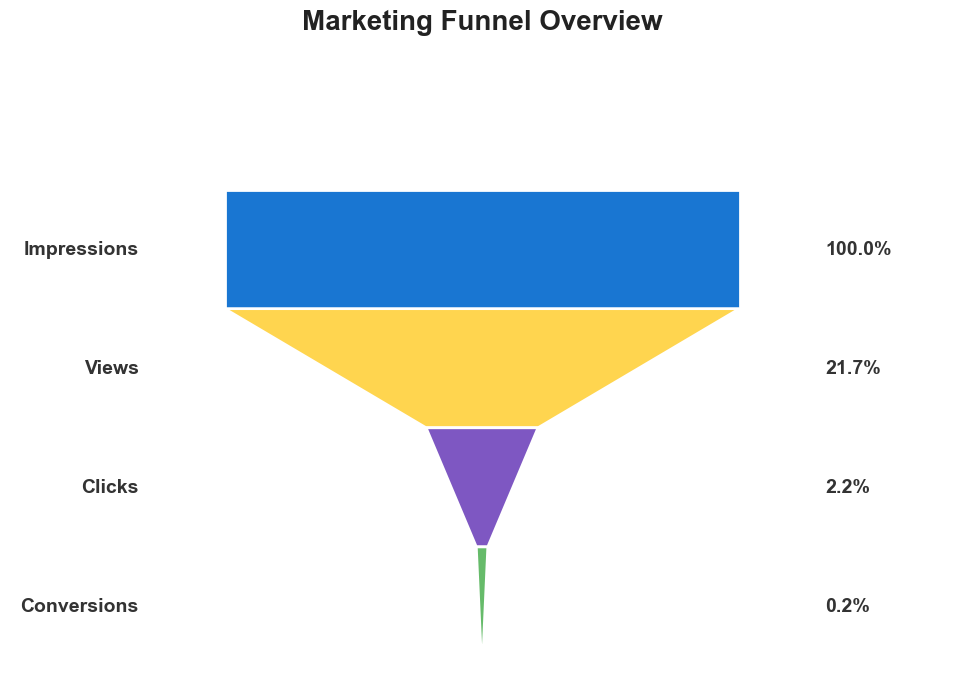

In [255]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches  # This was missing, now added
import pandas as pd  # assuming df already exists

# Data
funnel_stages = {
    'Impressions': df['Impressions'].sum(),
    'Views': df['Views'].sum(),
    'Clicks': df['Clicks'].sum(),
    'Conversions': df['Conversions'].sum()
}

stage_names = list(funnel_stages.keys())
stage_values = list(funnel_stages.values())

# Normalize stage widths relative to maximum
max_width = 12
widths = [max_width * (value / stage_values[0]) for value in stage_values]

# Enhanced Colors
colors = ['#1976D2', '#FFD54F', '#7E57C2', '#66BB6A']

# Plotting
fig, ax = plt.subplots(figsize=(10, 7))
y_start = 0
height = 1.8

for i in range(len(stage_names)):
    top_width = widths[i-1] if i != 0 else widths[0]
    bottom_width = widths[i]
    
    points = [
        [-top_width/2, y_start],
        [top_width/2, y_start],
        [bottom_width/2, y_start - height],
        [-bottom_width/2, y_start - height]
    ]
    
    polygon = patches.Polygon(points, closed=True, facecolor=colors[i], edgecolor='white', linewidth=2)
    ax.add_patch(polygon)
    
    # Stage name on left
    ax.text(-max_width/2 - 2, y_start - height/2, stage_names[i], va='center', ha='right', fontsize=14, fontweight='bold', color='#333333')
    
    # Percentage on right
    percent = (stage_values[i] / stage_values[0]) * 100
    ax.text(max_width/2 + 2, y_start - height/2, f"{percent:.1f}%", va='center', ha='left', fontsize=14, fontweight='bold', color='#333333')
    
    y_start -= height

# Cleanup and aesthetic improvements
ax.set_xlim(-max_width/2 - 5, max_width/2 + 5)
ax.set_ylim(y_start, 2)
ax.axis('off')

# Title
plt.title('Marketing Funnel Overview', fontsize=20, weight='bold', pad=20, color='#222222')
plt.tight_layout()
plt.show()


In [256]:
funnel_stages = pd.DataFrame(list(funnel_stages.items()), columns=['Stage', 'Total'])
funnel_stages

Stage       Total
0  Impressions  19342081.2
1        Views   4205523.0
2       Clicks    433933.0
3  Conversions     31545.0

### OBSERVATIONS:

1. From **19.3 million** impressions, only **4.2 million** people viewed
   - Only **22 percent** of people actually saw the ad.
   - About **78 percent** of the audience ignored or skipped it.

2. Out of **4.2 million** views, only **4.3 lakh** people clicked
   - The click rate is very low at **2.24 percent**.
   - This shows the ad was not strong enough to make people take action.

3. From **4.3 lakh** clicks, only **31,545** people converted
   - Only **7.3 percent** of people who clicked actually completed the action.
   - This means the landing page or next step after the click is not good enough.

4. Overall conversion is just **0.16 percent**
   - Out of **19.3 million** impressions, only **31,545** people converted.
   - This is very low considering the huge audience size.

5. Big drop at every stage
   - Heavy loss of people at every step:
     - **78 percent** dropped after impressions
     - **98 percent** dropped after views
     - **93 percent** dropped after clicks


### Recommendations

1. Make ad creatives more attractive
2. Improve the call-to-action in ads
3. Fix the landing page experience


  -------------------------------------------